# ------------    matrix plots    ------------
    # We'll learn how to create matrix plots (primarily heatmaps) in Seaborn.

In [1]:
# import libraries
import seaborn as sns
# shows figures in ipynb
%matplotlib inline

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lets load a builtin dataset of seaborn. we import 2 datasets: 'tips' and 'flights'
    # tips: a dataset of restaurant patrons' tipping behavior
    # flights: shows the number of passengers for each month of given years
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# --------    heatmap    --------
    # heatmap : primary way of showing the matrix plots
    # in order to work with heatmap, our data need to be in "matrix form"
    # "index name" and "column name" should match up so that 
    #       the "cell value" indicates something relavant to both of those index name and column name

## matrix form
    # consider "tips" dataframe. Variables (columns and row index) needs to be same
    # we can use many methods
        # 1. through a pivot table
        # 2. Getting correlation data

### ----  using correlation  ----

In [4]:
tc = tips.corr()     # notice the same variable names in the column and row
print(tc)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<AxesSubplot:>

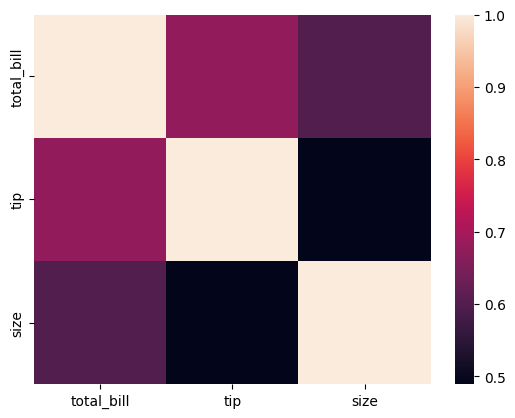

In [5]:
# creating heatmap
sns.heatmap(tc)
# it just color those values based on some gradient scales
# it helps to compare relative values of a correlation

<AxesSubplot:>

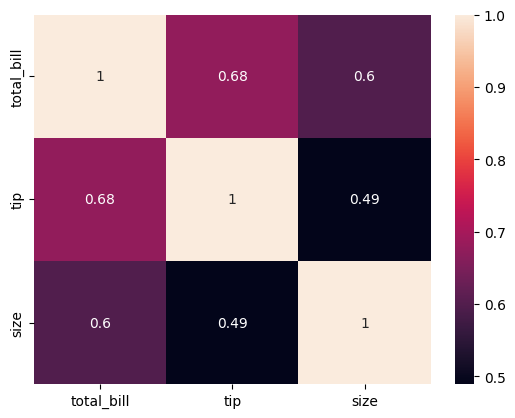

In [6]:
# annotations (show the values)
sns.heatmap(tc, annot=True)

<AxesSubplot:>

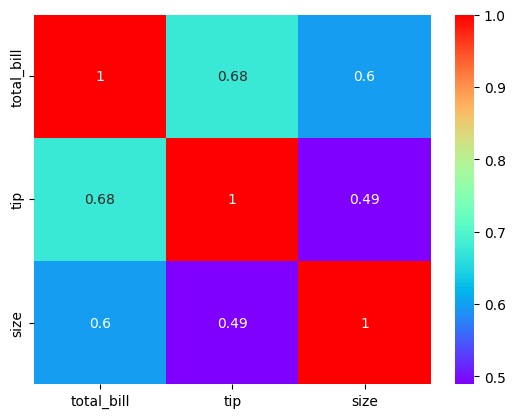

In [7]:
# setting colormap
sns.heatmap(tc, annot=True, cmap='rainbow')

### ----  using Pivot  ----

In [5]:
# Pivot: use pivot table for Flight data. We transform this data as below: 
    # set "month" is the "index"
    # set "year" as "columns"
    # set number of passengers as "values"
flPv = flights.pivot_table(index='month', columns='year', values='passengers')
flPv    # notice the correlation

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

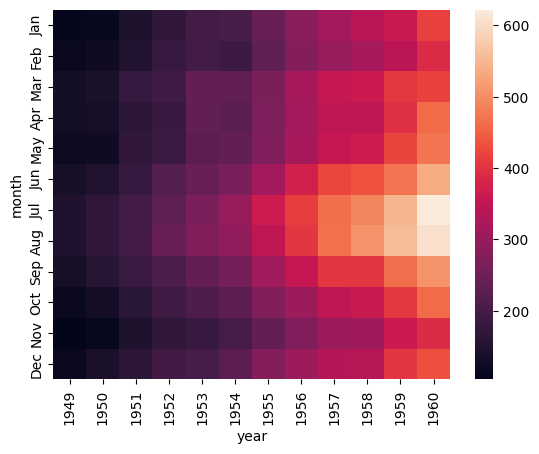

In [6]:
# heatmap
sns.heatmap(flPv)
# notice as the year increase, there's more flight
# also notice the popular months are the summer months: June, July, August

<AxesSubplot:xlabel='year', ylabel='month'>

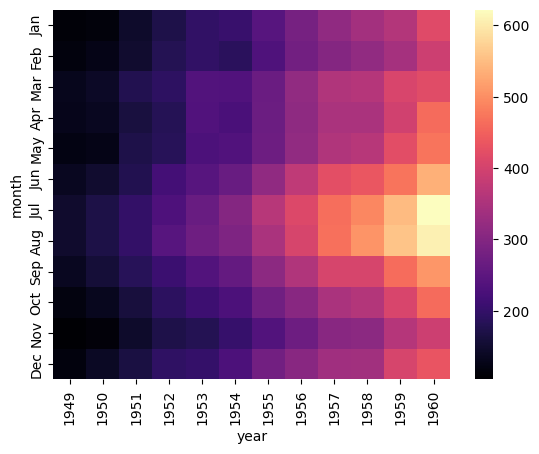

In [7]:
# change color map "cmap"
sns.heatmap(flPv, cmap='magma')

<AxesSubplot:xlabel='year', ylabel='month'>

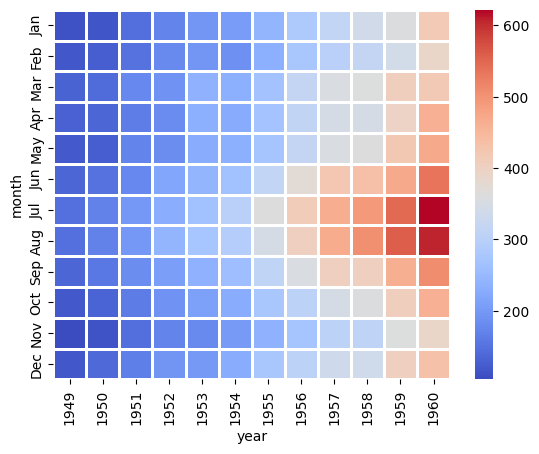

In [8]:
# to seperate the squares: linecolor, linewidth
sns.heatmap(flPv, cmap='coolwarm', linecolor='white', linewidth=1)

___

# --------    clustermap    --------
    # The clustermap uses "hierarchal clustering" to produce a clustered version of the heatmap.

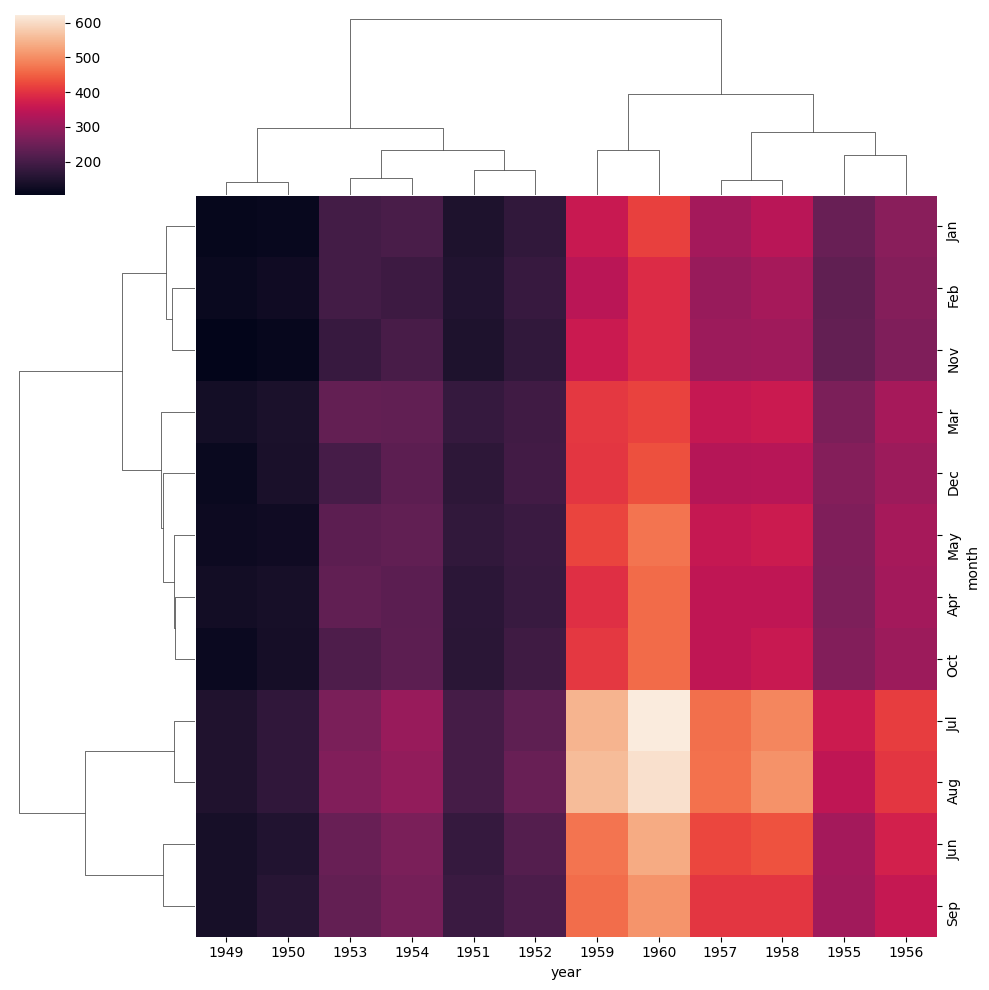

In [10]:
sns.clustermap(flPv)